Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
Train Size:  60000
Test Size:  10000
ConvLayers:  1
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
flatten_1 (Flatten)          (None, 43264)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               5537920   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)     

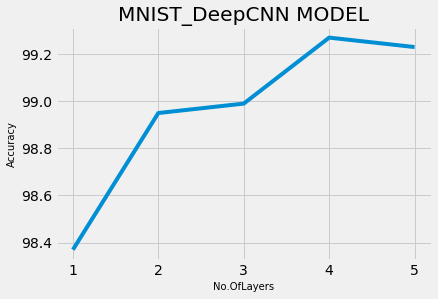

Done!

Loading model from disk:
10000/10000 [==============================] - 2s 239us/step
Accuracy from trained Model:  99.22999999999999
Max Acc:  99.27
Optimal Layers:  4


In [0]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
from keras.models import Sequential 
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import pandas as pd 
from matplotlib import style
import pickle
import numpy as np 
from sklearn.externals import joblib

style.use('fivethirtyeight')

(x_train,y_train), (x_test,y_test) = (tf.keras.datasets.mnist.load_data())

# print(x_test[0].shape)
# print(x_test[0])
print("Train Size: ",len(x_train))
print("Test Size: ",len(x_test))

# reshape the dataset to 4 dims (keras needs 4d numpy arrays)

x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# normalize the features (divide by 255)
x_train = x_train/255
x_test = x_test/255

# create sequential model and add layers
# to find optimal number of conv layers varying from (1-5)
score = []
for i in range(5):
  print("ConvLayers: ",i+1)
  model = Sequential()
  model.add(Conv2D(64,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
#   model.add(MaxPooling2D(pool_size=(2,2)))
  for j in range(i):
    model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
    
  model.add(Flatten())	# flatten to form the FC layer
  model.add(Dense(128,activation=tf.nn.relu))
  model.add(Dropout(0.5))
  model.add(Dense(64,activation=tf.nn.relu))
  model.add(Dropout(0.5))
  model.add(Dense(10,activation=tf.nn.softmax))
  print("Model Summary: ")
  print(model.summary())
  
  print("Training the Model: ")
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  model.fit(x=x_train,y=y_train,epochs=10,batch_size=100)
  
#   save the trained model.
  filename = 'cnn_Model.sav'
  pickle.dump(model, open(filename, 'wb'))
  val = (model.evaluate(x_test,y_test))
  score.append(val[1]*100)
  print("Testing Accuracy: ",val[1]*100)
  

plt.plot(np.arange(5)+1,score)
plt.xlabel('No.OfLayers', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('MNIST_DeepCNN MODEL')
plt.show()
print("Done!")

print()
# load the model from disk
print("Loading model from disk:")
loaded_model = joblib.load(filename)
result = loaded_model.evaluate(x_test, y_test)
print("Accuracy from trained Model: ",result[1]*100)

max_acc = max(score)
index = score.index(max_acc)
print("Max Acc: ",max_acc)
print("Optimal Layers: ",index+1)





